In [22]:
#to import data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('risk_data.csv')
df.head(10)

,PROSPECTID,time_since_recent_payment,num_times_delinquent,num_times_30p_dpd,num_std,recent_level_of_deliq,PL_enq,time_since_recent_enq,MARITALSTATUS,EDUCATION,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,11,0,21,29,6,566,Married,12TH,...,0.200,0.798,0,1,1,0,PL,PL,696,P2
1,2,47,0,0,0,0,0,209,Single,GRADUATE,...,1.000,0.370,0,0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,9,0,10,25,0,587,Married,SSC,...,1.000,0.585,0,0,1,0,ConsumerLoan,others,693,P2
3,4,-99999,0,0,5,0,-99999,-99999,Married,SSC,...,1.000,0.990,0,0,0,0,others,others,673,P2
4,5,583,0,0,53,0,0,3951,Married,POST-GRADUATE,...,0.333,0.000,0,0,0,0,AL,AL,753,P1
5,6,245,14,13,5,26,7,7,Married,12TH,...,0.167,0.000,0,0,1,0,ConsumerLoan,PL,668,P3
6,7,49,0,0,25,0,-99999,-99999,Married,SSC,...,0.667,0.998,0,0,1,0,others,others,703,P1
7,8,74,3,2,27,133,0,2,Married,UNDER GRADUATE,...,0.333,0.300,0,0,0,0,ConsumerLoan,others,676,P2
8,9,424,3,3,0,38,0,108,Married,SSC,...,1.000,0.465,0,0,0,0,ConsumerLoan,others,658,P4
9,10,39,0,0,39,0,-99999,-99999,Married,12TH,...,0.500,1.121,0,0,0,0,others,others,705,P1


In [3]:
df.drop(columns=['PROSPECTID','num_times_30p_dpd','last_prod_enq2','first_prod_enq2'], inplace=True)


In [4]:
df.replace(-99999, 0, inplace=True)
df.head()

,time_since_recent_payment,num_times_delinquent,num_std,recent_level_of_deliq,PL_enq,time_since_recent_enq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
0,549,11,21,29,6,566,Married,12TH,48,M,51000,114,0.200,0.798,0,1,1,0,696,P2
1,47,0,0,0,0,209,Single,GRADUATE,23,F,19000,50,1.000,0.370,0,0,0,0,685,P2
2,302,9,10,25,0,587,Married,SSC,40,M,18,191,1.000,0.585,0,0,1,0,693,P2
3,0,0,5,0,0,0,Married,SSC,34,M,10000,246,1.000,0.990,0,0,0,0,673,P2
4,583,0,53,0,0,3951,Married,POST-GRADUATE,48,M,15000,75,0.333,0.000,0,0,0,0,753,P1


In [5]:
columns = ['MARITALSTATUS', 'GENDER', 'Approved_Flag', 'EDUCATION']

for column in columns:
    unique_values = df[column].unique()
    print(f"{column} = {' '.join([f'{value}' for value in unique_values])}")

MARITALSTATUS = Married Single
GENDER = M F
Approved_Flag = P2 P1 P3 P4
EDUCATION = 12TH GRADUATE SSC POST-GRADUATE UNDER GRADUATE OTHERS PROFESSIONAL


In [6]:
columns_to_encode = ['MARITALSTATUS', 'GENDER', 'Approved_Flag', 'EDUCATION']

encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])
    
df.head(15).round()

,time_since_recent_payment,num_times_delinquent,num_std,recent_level_of_deliq,PL_enq,time_since_recent_enq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
0,549,11,21,29,6,566,0,0,48,1,51000,114,0.0,1.0,0,1,1,0,696,1
1,47,0,0,0,0,209,1,1,23,0,19000,50,1.0,0.0,0,0,0,0,685,1
2,302,9,10,25,0,587,0,5,40,1,18,191,1.0,1.0,0,0,1,0,693,1
3,0,0,5,0,0,0,0,5,34,1,10000,246,1.0,1.0,0,0,0,0,673,1
4,583,0,53,0,0,3951,0,3,48,1,15000,75,0.0,0.0,0,0,0,0,753,0
5,245,14,5,26,7,7,0,0,35,1,0,154,0.0,0.0,0,0,1,0,668,2
6,49,0,25,0,0,0,0,5,35,1,30000,81,1.0,1.0,0,0,1,0,703,0
7,74,3,27,133,0,2,0,6,30,1,27000,126,0.0,0.0,0,0,0,0,676,1
8,424,3,0,38,0,108,0,5,39,0,18000,122,1.0,0.0,0,0,0,0,658,3
9,39,0,39,0,0,0,0,0,28,1,18000,68,0.0,1.0,0,0,0,0,705,0


In [7]:
df.loc[df['NETMONTHLYINCOME'] < 100, 'NETMONTHLYINCOME'] = 0

print(df['NETMONTHLYINCOME'])

0        51000
1        19000
2            0
3        10000
4        15000
         ...  
51331    18500
51332    25000
51333    18000
51334    12802
51335    16000
Name: NETMONTHLYINCOME, Length: 51336, dtype: int64


In [8]:
columns_to_modify = ['time_since_recent_payment', 'time_since_recent_enq','NETMONTHLYINCOME']

df[columns_to_modify] = df[columns_to_modify].replace(0, pd.NA)
mean_values = df[columns_to_modify].mean()
df.fillna(mean_values, inplace=True)
df.head(10).round()

,time_since_recent_payment,num_times_delinquent,num_std,recent_level_of_deliq,PL_enq,time_since_recent_enq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
0,549.0,11,21,29,6,566.0,0,0,48,1,51000.0,114,0.0,1.0,0,1,1,0,696,1
1,47.0,0,0,0,0,209.0,1,1,23,0,19000.0,50,1.0,0.0,0,0,0,0,685,1
2,302.0,9,10,25,0,587.0,0,5,40,1,26519.0,191,1.0,1.0,0,0,1,0,693,1
3,249.0,0,5,0,0,263.0,0,5,34,1,10000.0,246,1.0,1.0,0,0,0,0,673,1
4,583.0,0,53,0,0,3951.0,0,3,48,1,15000.0,75,0.0,0.0,0,0,0,0,753,0
5,245.0,14,5,26,7,7.0,0,0,35,1,26519.0,154,0.0,0.0,0,0,1,0,668,2
6,49.0,0,25,0,0,263.0,0,5,35,1,30000.0,81,1.0,1.0,0,0,1,0,703,0
7,74.0,3,27,133,0,2.0,0,6,30,1,27000.0,126,0.0,0.0,0,0,0,0,676,1
8,424.0,3,0,38,0,108.0,0,5,39,0,18000.0,122,1.0,0.0,0,0,0,0,658,3
9,39.0,0,39,0,0,263.0,0,0,28,1,18000.0,68,0.0,1.0,0,0,0,0,705,0


In [9]:
df.isnull().sum()

time_since_recent_payment    0
num_times_delinquent         0
num_std                      0
recent_level_of_deliq        0
PL_enq                       0
time_since_recent_enq        0
MARITALSTATUS                0
EDUCATION                    0
AGE                          0
GENDER                       0
NETMONTHLYINCOME             0
Time_With_Curr_Empr          0
pct_of_active_TLs_ever       0
pct_currentBal_all_TL        0
CC_Flag                      0
PL_Flag                      0
HL_Flag                      0
GL_Flag                      0
Credit_Score                 0
Approved_Flag                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time_since_recent_payment  51336 non-null  float64
 1   num_times_delinquent       51336 non-null  int64  
 2   num_std                    51336 non-null  int64  
 3   recent_level_of_deliq      51336 non-null  int64  
 4   PL_enq                     51336 non-null  int64  
 5   time_since_recent_enq      51336 non-null  float64
 6   MARITALSTATUS              51336 non-null  int32  
 7   EDUCATION                  51336 non-null  int32  
 8   AGE                        51336 non-null  int64  
 9   GENDER                     51336 non-null  int32  
 10  NETMONTHLYINCOME           51336 non-null  float64
 11  Time_With_Curr_Empr        51336 non-null  int64  
 12  pct_of_active_TLs_ever     51336 non-null  float64
 13  pct_currentBal_all_TL      51336 non-null  flo

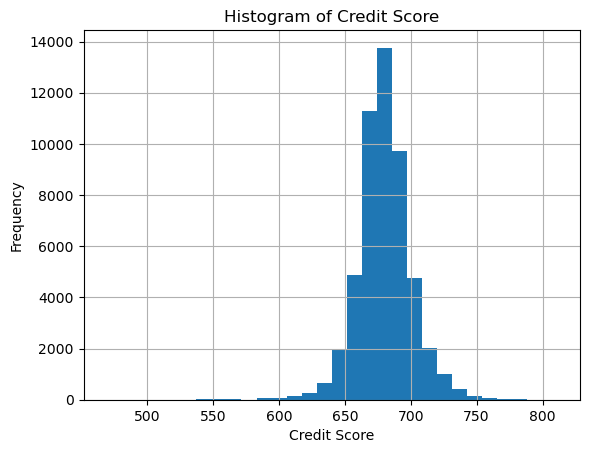

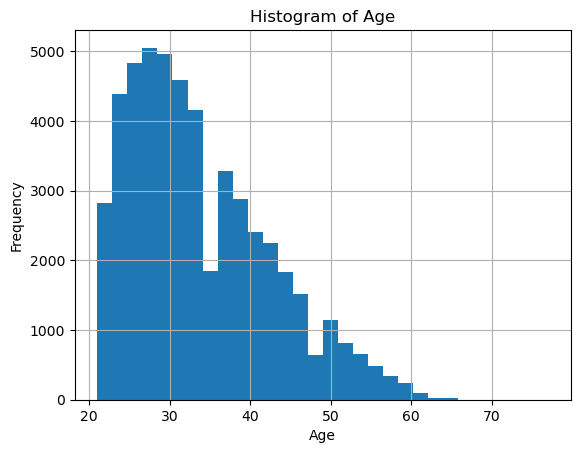

In [11]:
df['Credit_Score'].hist(bins=30)
plt.title('Histogram of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Histogram of Age
df['AGE'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

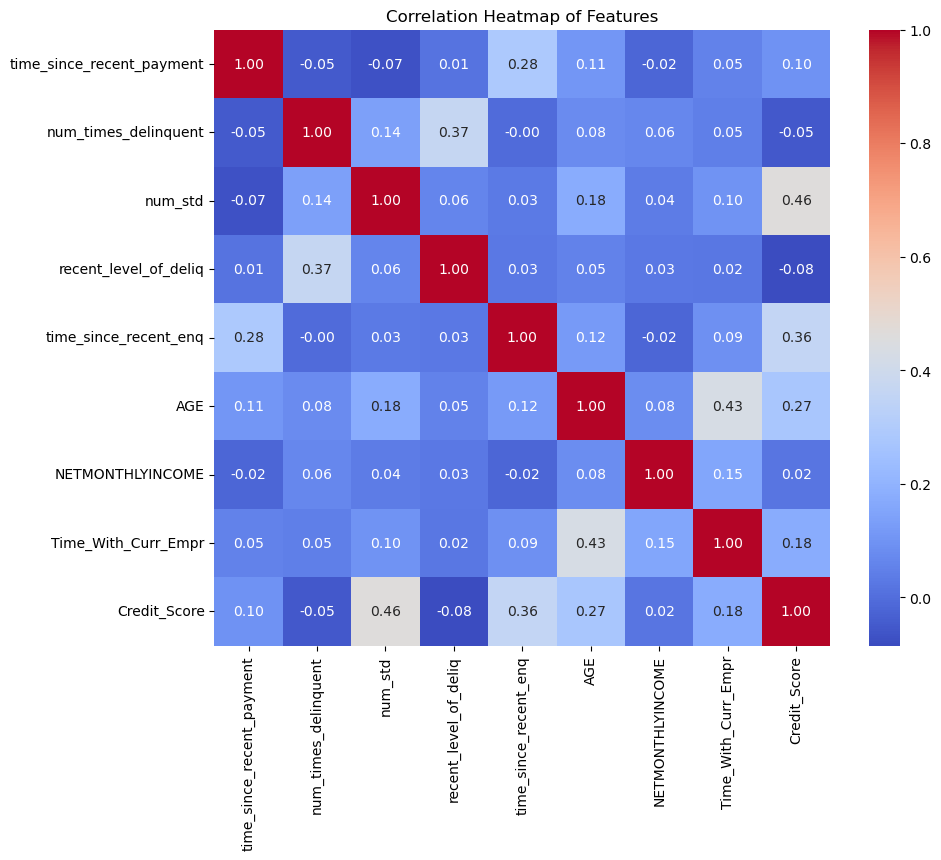

In [12]:
features = ['time_since_recent_payment', 'num_times_delinquent', 'num_std', 'recent_level_of_deliq', 
            'time_since_recent_enq', 'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'Credit_Score']
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

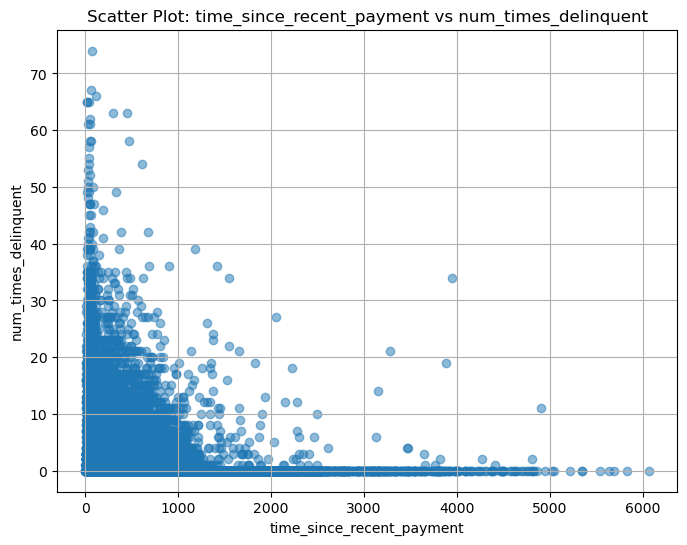

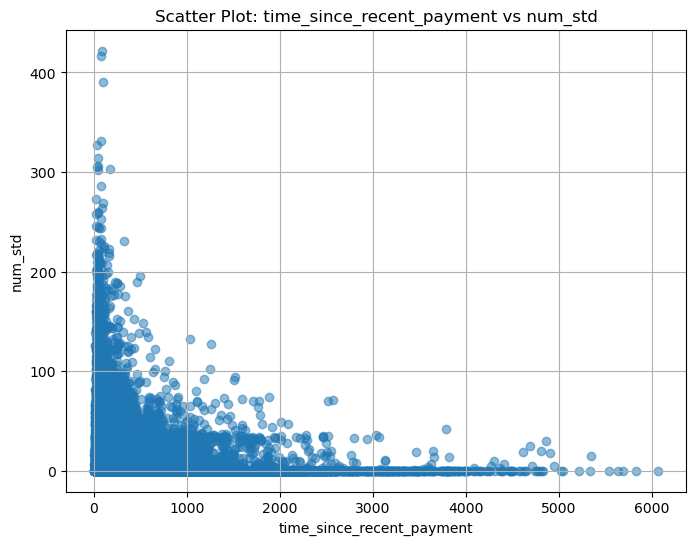

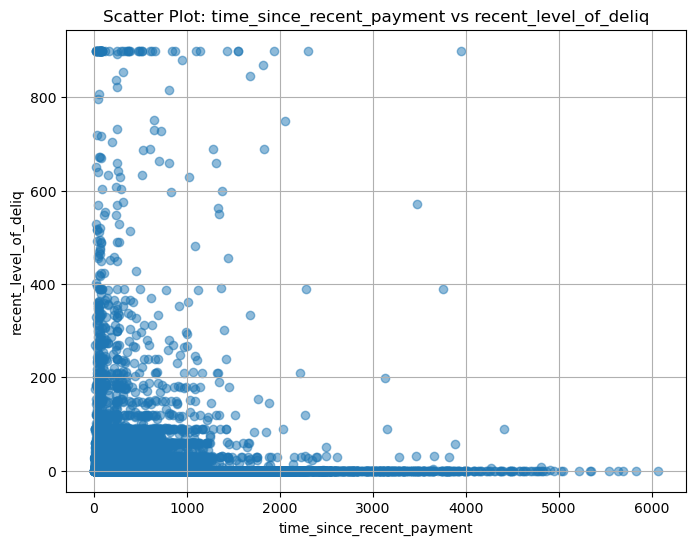

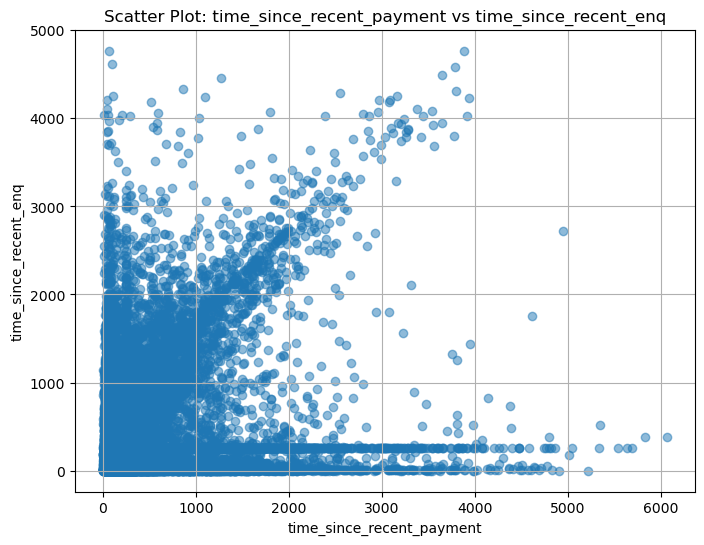

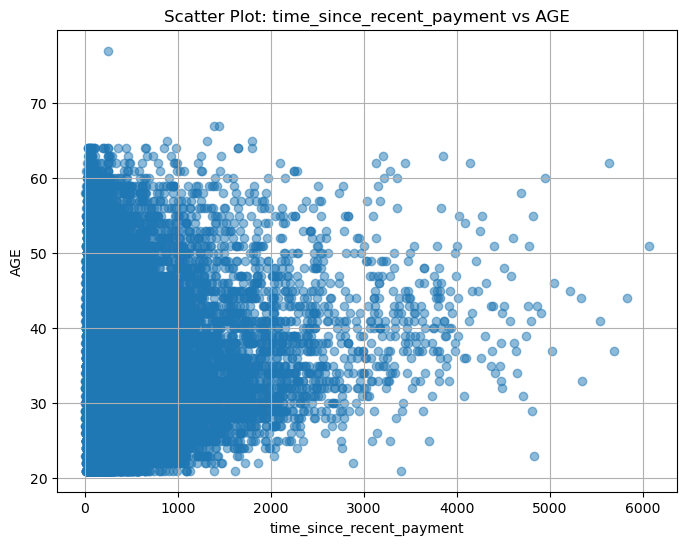

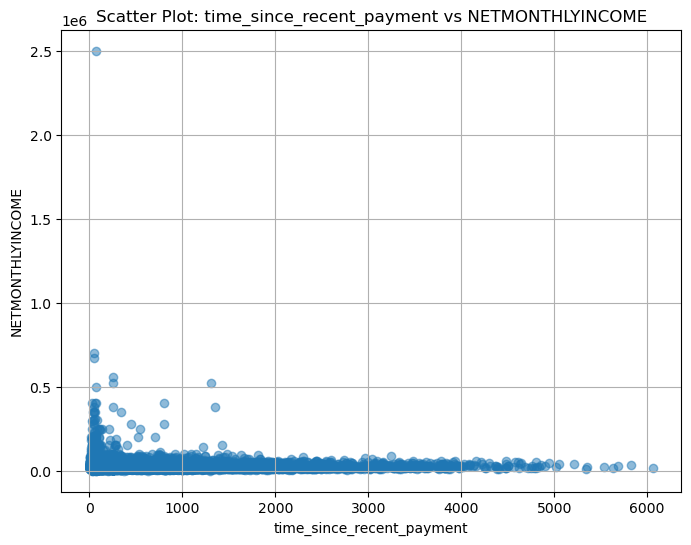

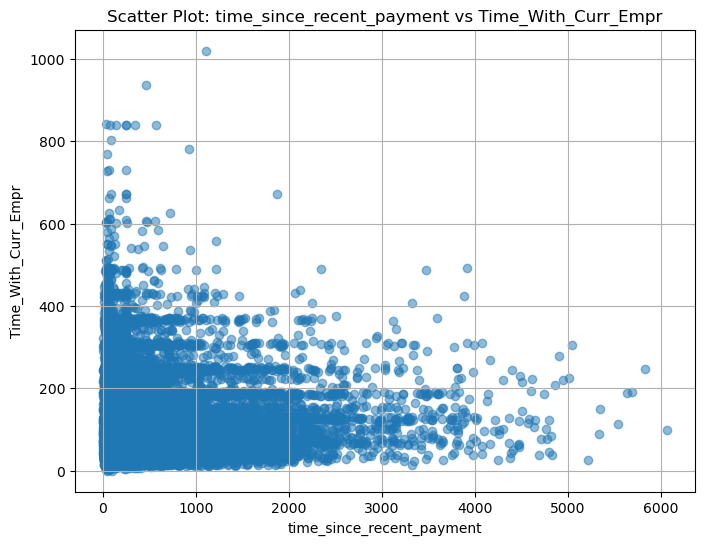

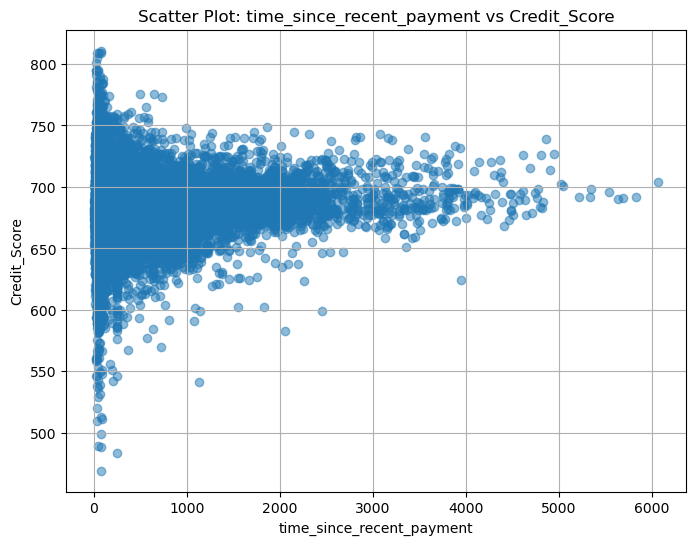

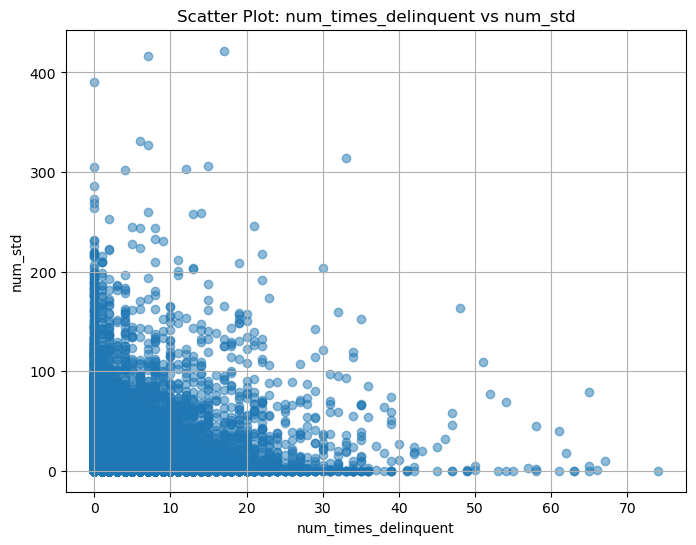

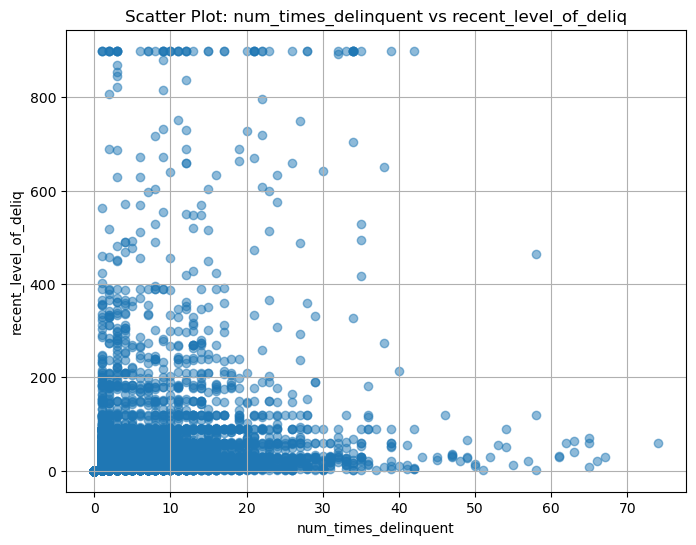

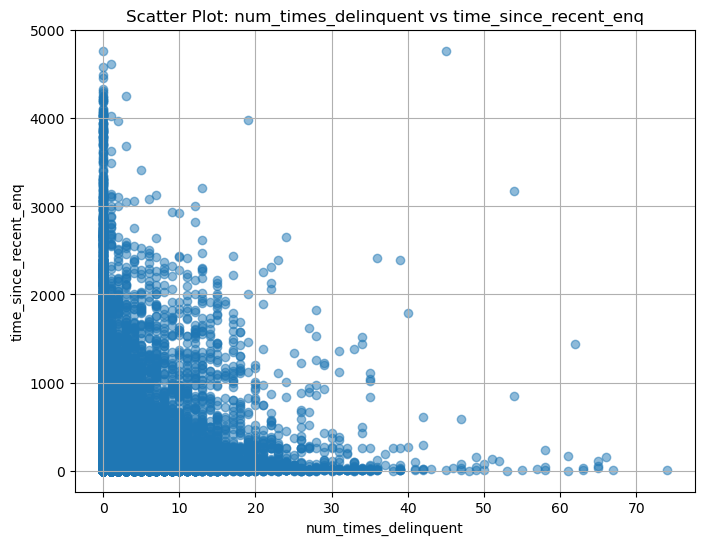

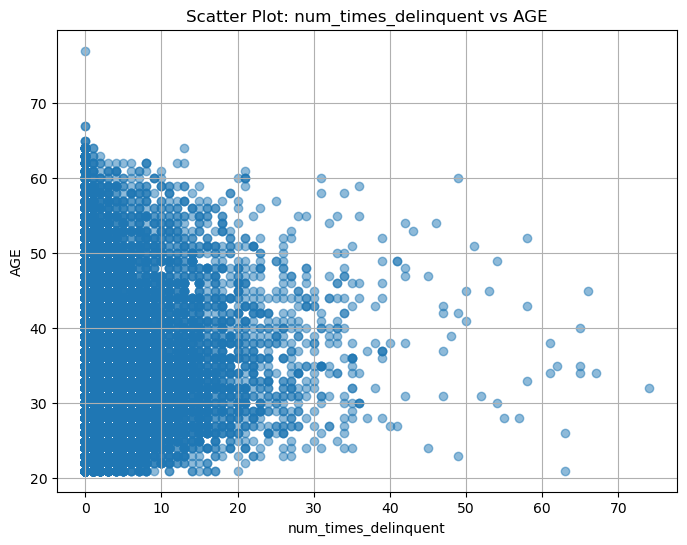

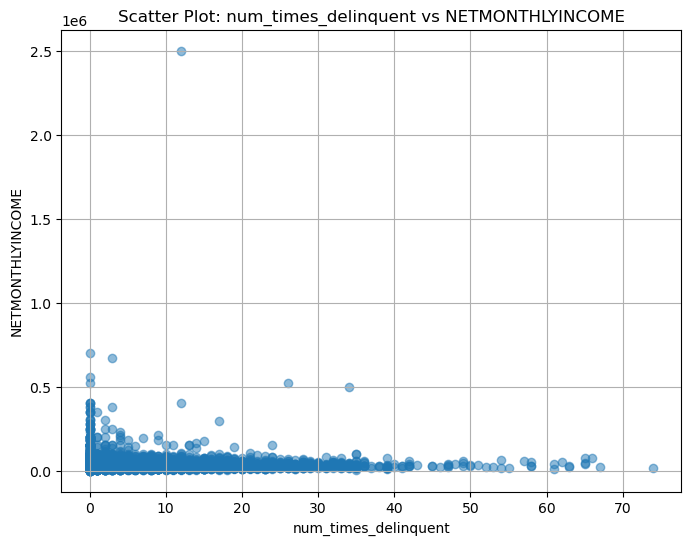

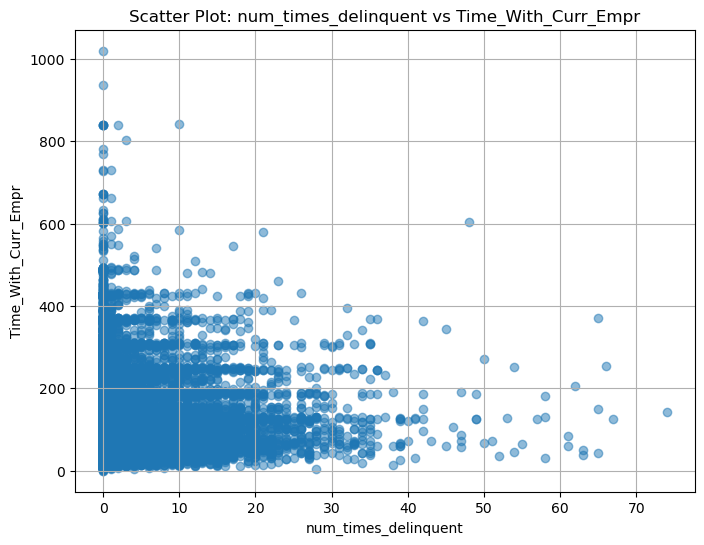

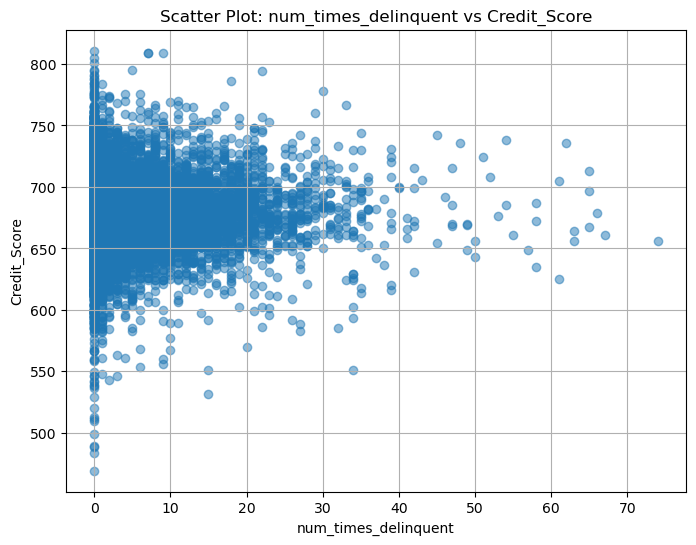

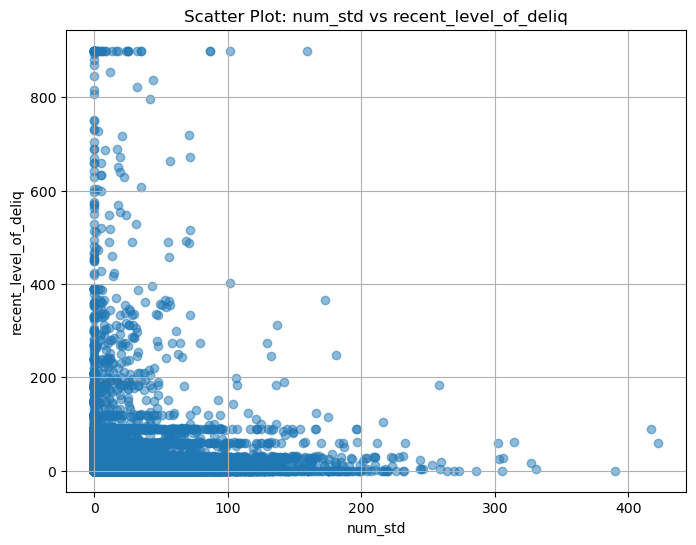

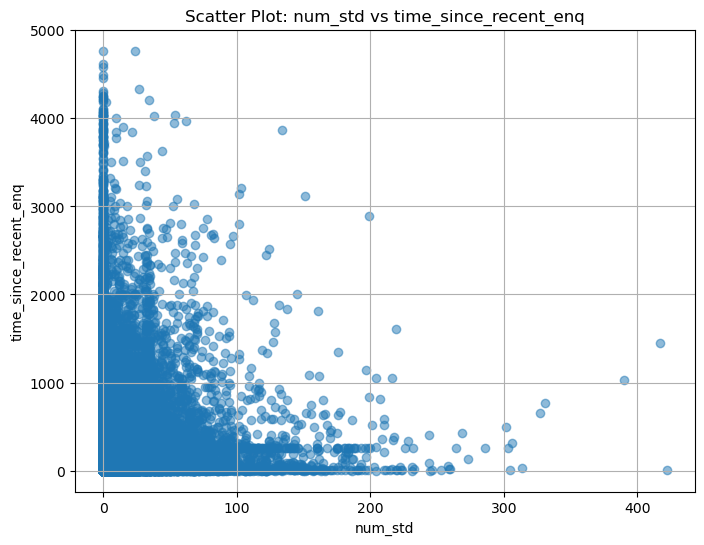

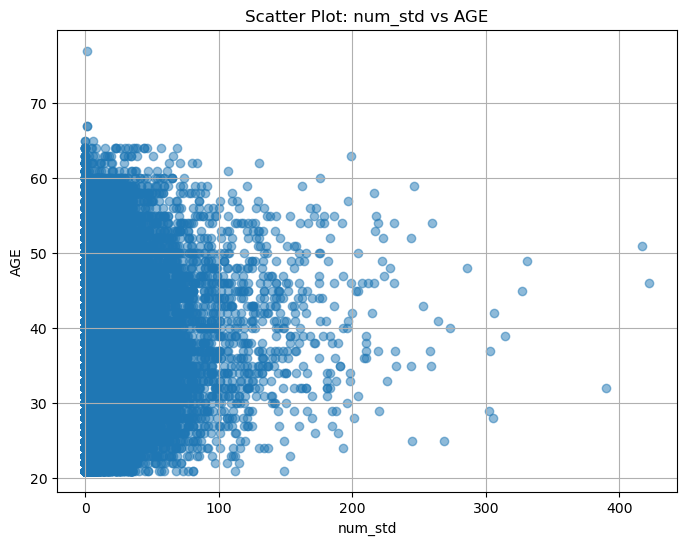

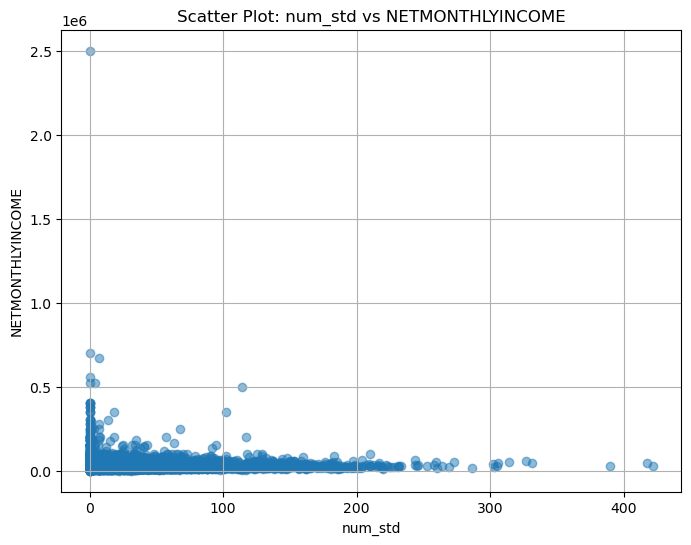

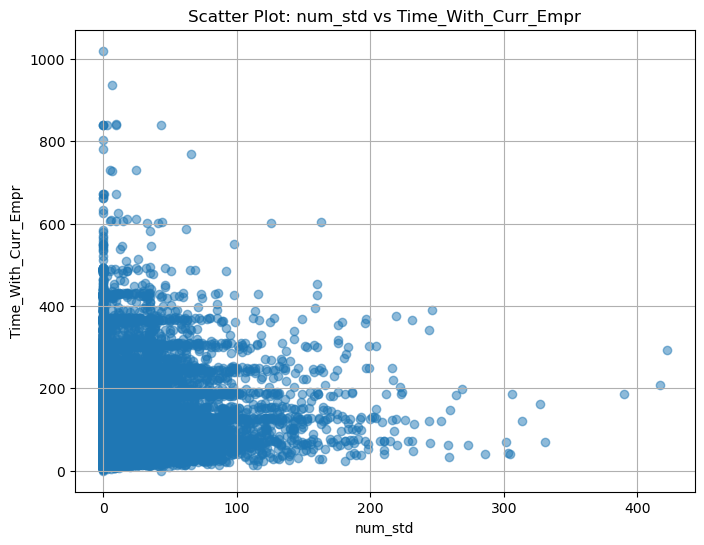

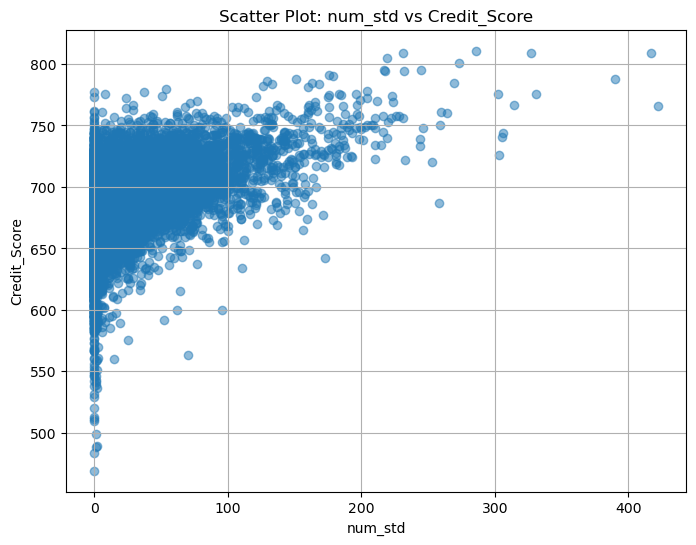

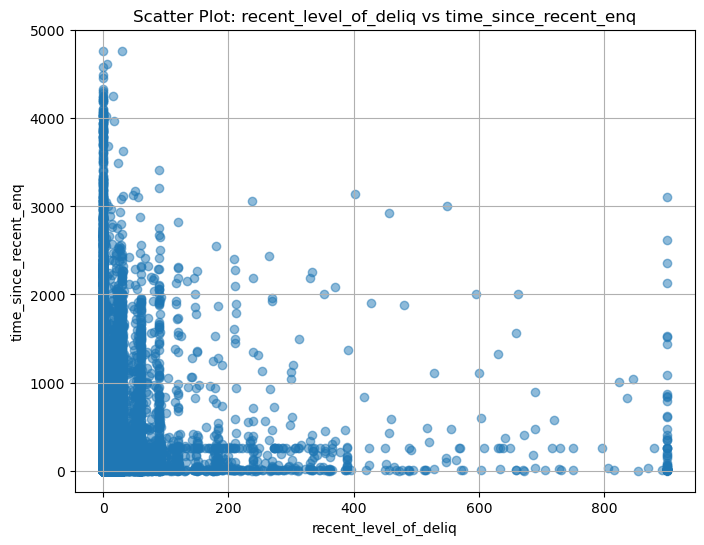

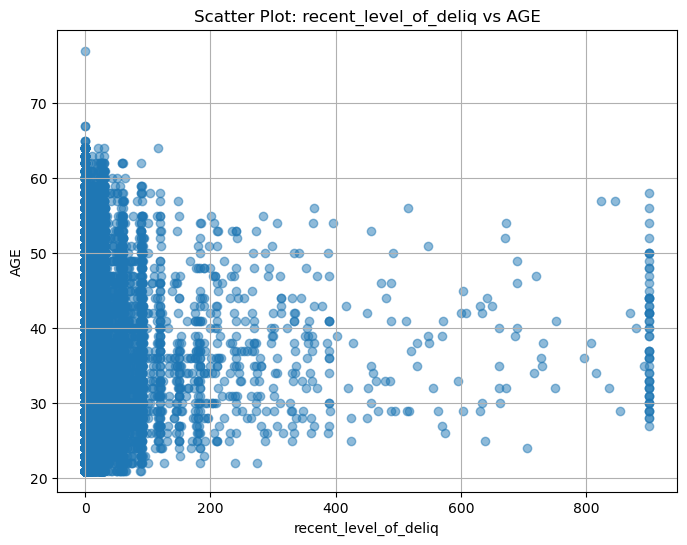

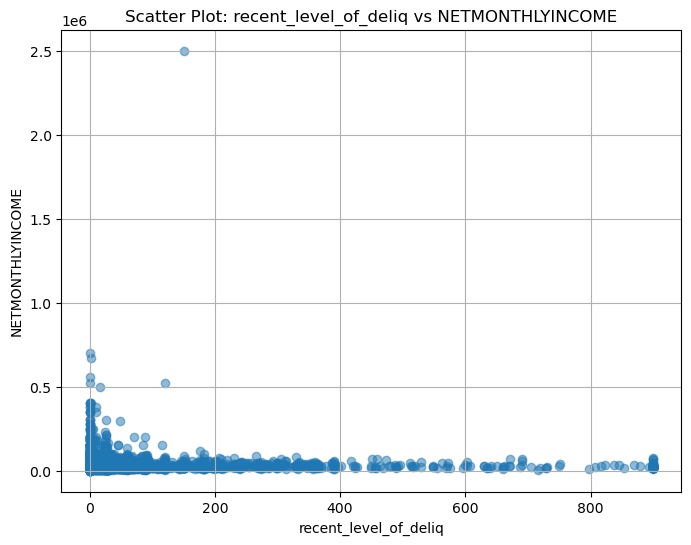

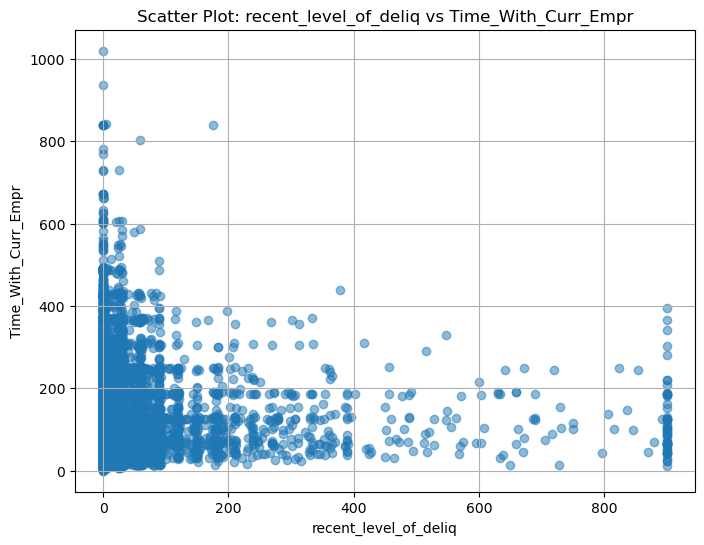

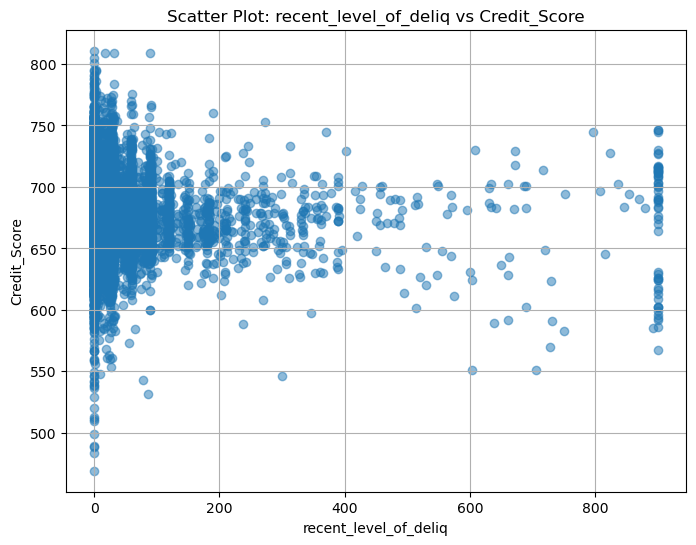

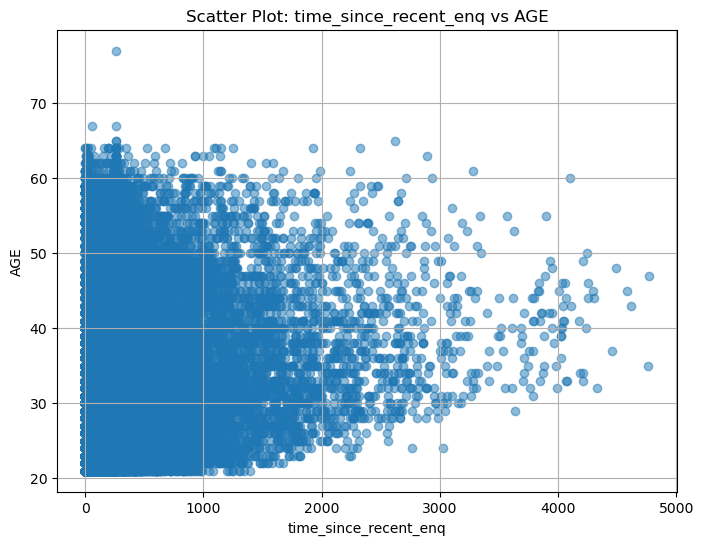

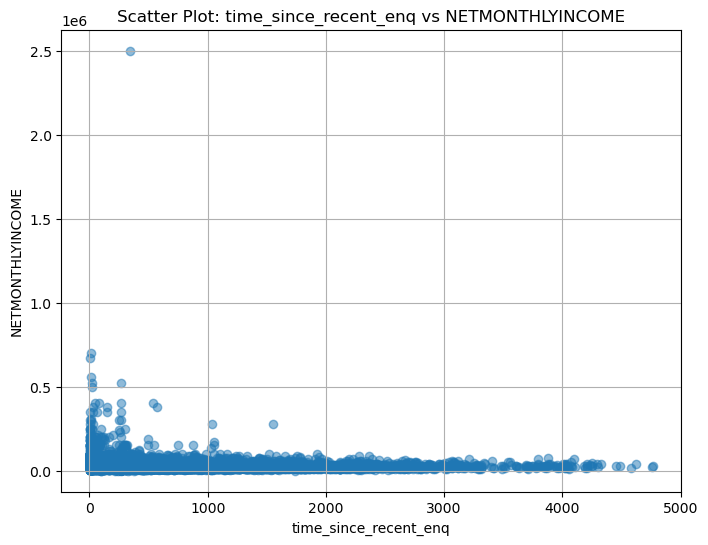

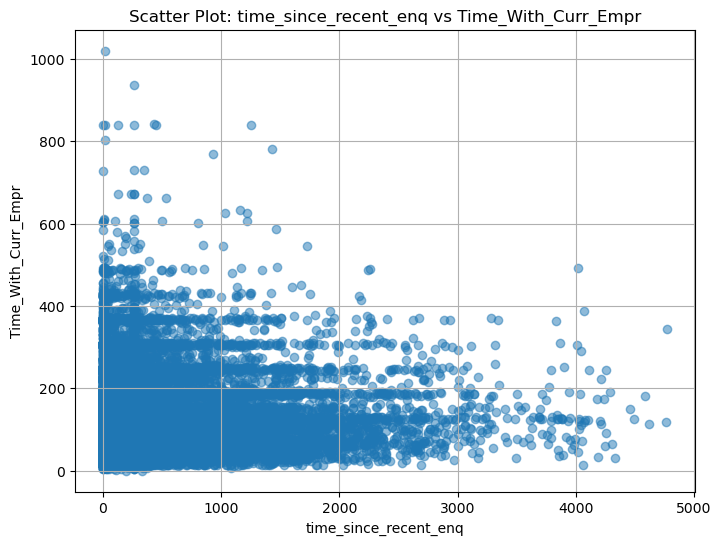

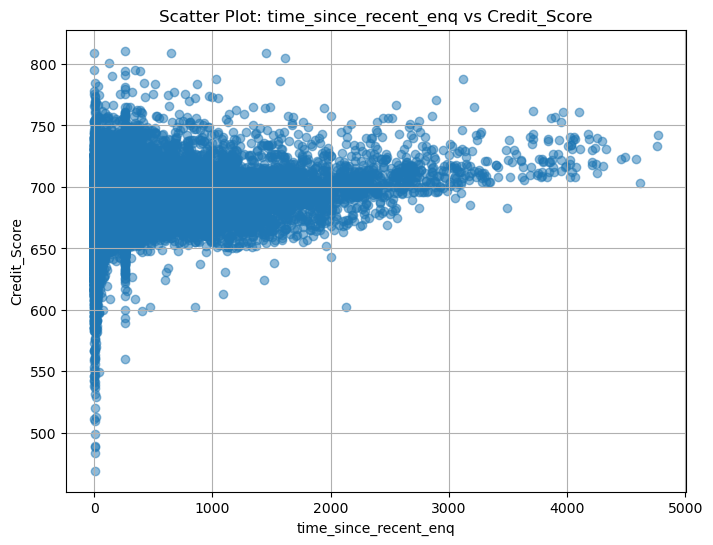

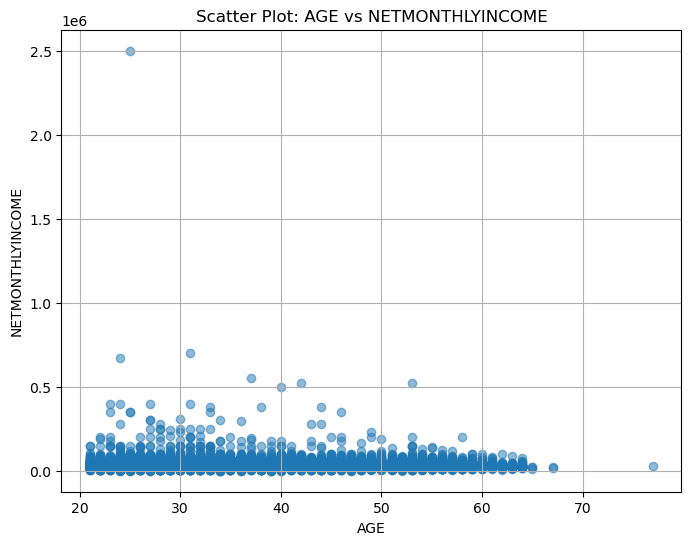

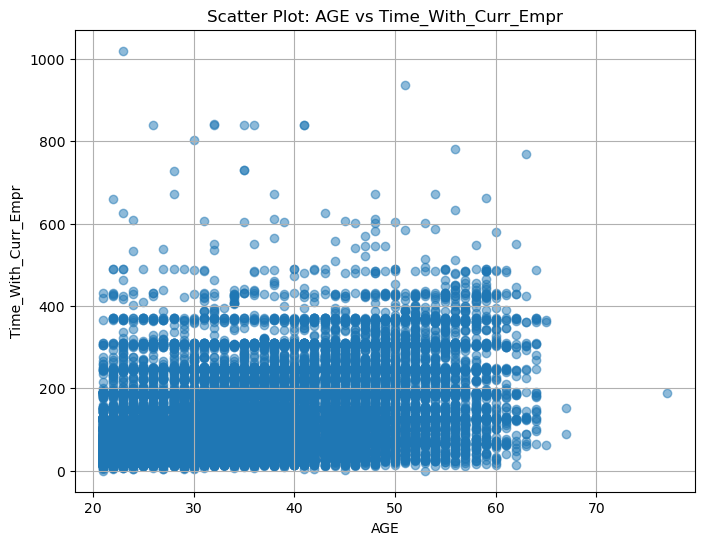

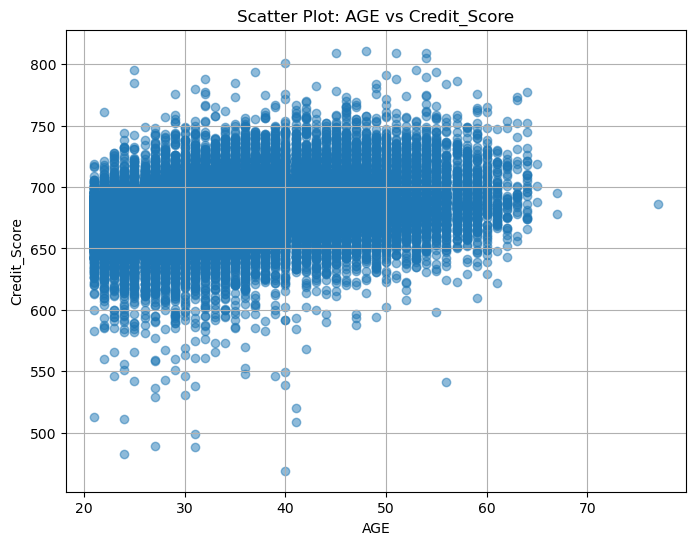

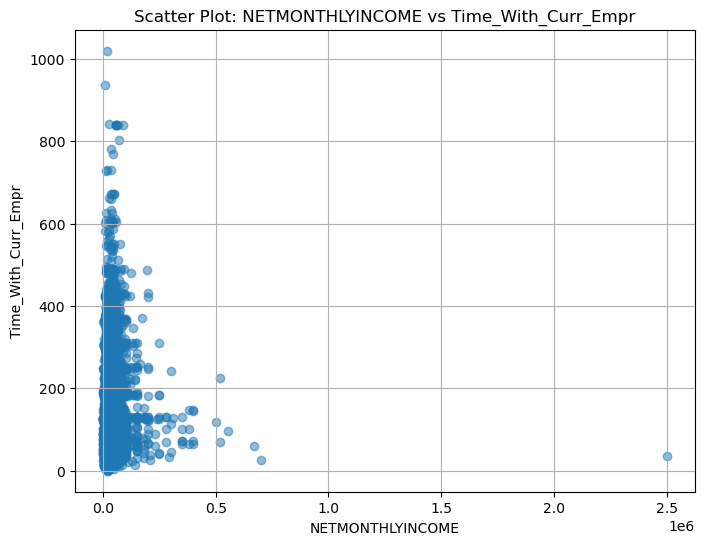

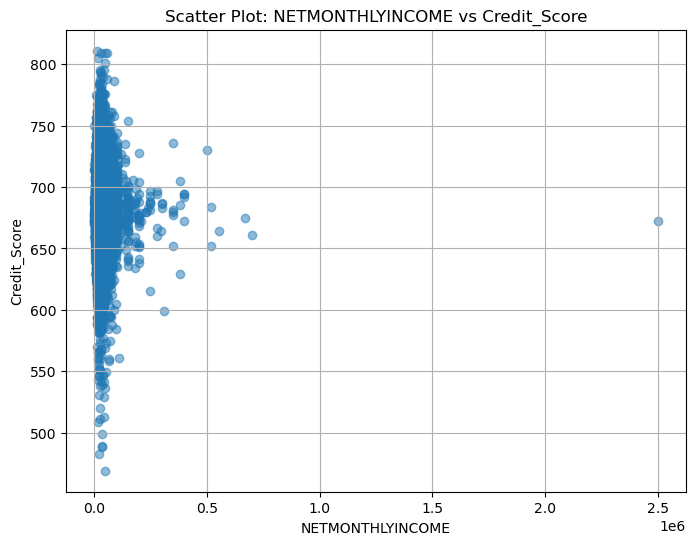

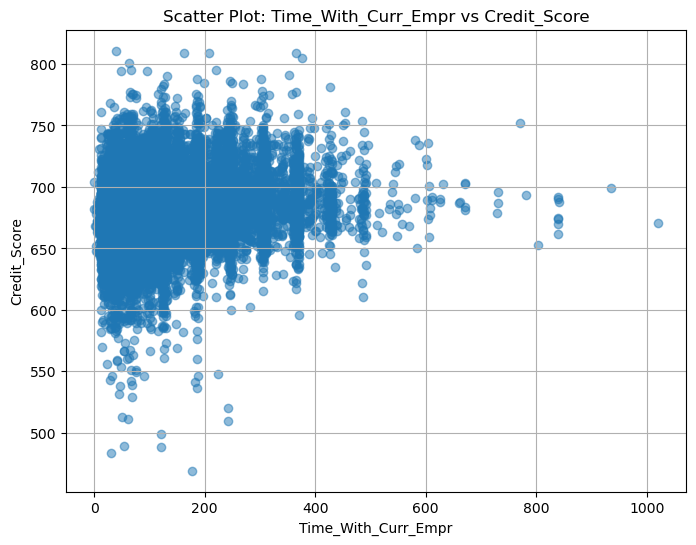

In [13]:
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df[features[i]], df[features[j]], alpha=0.5)
        plt.title(f'Scatter Plot: {features[i]} vs {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.grid(True)
        plt.show()

In [14]:
# Define features (X) and target variable (y)
X = df.drop('Approved_Flag', axis=1)
y = df['Approved_Flag']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9928905336969225
Confusion Matrix:
 [[1100    0   35    0]
 [   0 6379    0    0]
 [  38    0 1498    0]
 [   0    0    0 1218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1135
           1       1.00      1.00      1.00      6379
           2       0.98      0.98      0.98      1536
           3       1.00      1.00      1.00      1218

    accuracy                           0.99     10268
   macro avg       0.99      0.99      0.99     10268
weighted avg       0.99      0.99      0.99     10268



In [17]:
X_test.head()

,time_since_recent_payment,num_times_delinquent,num_std,recent_level_of_deliq,PL_enq,time_since_recent_enq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score
8564,138.000000,2,0,26,0,33.000000,1,1,31,1,30000.0,124,0.667,0.039,0,0,0,0,654
26313,249.463599,0,0,0,0,262.542052,0,3,26,1,32000.0,125,1.000,1.000,0,0,0,0,671
12212,178.000000,0,0,0,0,1118.000000,1,1,31,1,15000.0,130,0.250,0.000,0,0,0,0,683
37578,68.000000,0,0,0,0,464.000000,0,5,40,0,24000.0,54,1.000,0.305,0,0,0,0,697
21647,1109.000000,0,3,0,1,115.000000,0,1,53,1,20000.0,63,0.000,0.000,0,0,1,0,675


In [18]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

Feature ranking:
1. feature 18 (0.769125)
2. feature 5 (0.051822)
3. feature 2 (0.046534)
4. feature 4 (0.018559)
5. feature 3 (0.014671)
6. feature 12 (0.014571)
7. feature 8 (0.014168)
8. feature 0 (0.012152)
9. feature 1 (0.011246)
10. feature 11 (0.010996)
11. feature 13 (0.010705)
12. feature 10 (0.009423)
13. feature 7 (0.004270)
14. feature 16 (0.002699)
15. feature 17 (0.002572)
16. feature 15 (0.002203)
17. feature 6 (0.001818)
18. feature 14 (0.001287)
19. feature 9 (0.001177)


In [19]:
df.head()

,time_since_recent_payment,num_times_delinquent,num_std,recent_level_of_deliq,PL_enq,time_since_recent_enq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
0,549.000000,11,21,29,6,566.000000,0,0,48,1,51000.000000,114,0.200,0.798,0,1,1,0,696,1
1,47.000000,0,0,0,0,209.000000,1,1,23,0,19000.000000,50,1.000,0.370,0,0,0,0,685,1
2,302.000000,9,10,25,0,587.000000,0,5,40,1,26518.684515,191,1.000,0.585,0,0,1,0,693,1
3,249.463599,0,5,0,0,262.542052,0,5,34,1,10000.000000,246,1.000,0.990,0,0,0,0,673,1
4,583.000000,0,53,0,0,3951.000000,0,3,48,1,15000.000000,75,0.333,0.000,0,0,0,0,753,0


In [20]:
new_inquary_result = {
    'time_since_recent_payment': 520,
    'num_times_delinquent': 3,
    'num_std': 0,
    'recent_level_of_deliq': 21,
    'PL_enq': 0,
    'time_since_recent_enq': 70,
    'MARITALSTATUS':0,
    'EDUCATION': 1,
    'AGE': 30,
    'GENDER': 0,
    'NETMONTHLYINCOME': 17000,
    'Time_With_Curr_Empr': 115,
    'pct_of_active_TLs_ever': 1,
    'pct_currentBal_all_TL': 0.465,
    'CC_Flag': 0,
    'PL_Flag': 1,
    'HL_Flag': 1,
    'GL_Flag': 0,
    'Credit_Score': 640
}

# Convert individual feature data into DataFrame
individual_df = pd.DataFrame([new_inquary_result])

# Preprocess the individual feature data (e.g., encoding categorical variables)
# Use the same preprocessing steps applied to the training data

# Make predictions using the trained model
prediction = rf_classifier.predict(individual_df)

# Display the prediction
print("Prediction:", prediction)

Prediction: [3]


In [24]:
# Initialize decision tree classifier
clf = DecisionTreeClassifier()

# Fit classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9938644331904948
Confusion Matrix:
 [[1103    0   32    0]
 [   0 6379    0    0]
 [  31    0 1505    0]
 [   0    0    0 1218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1135
           1       1.00      1.00      1.00      6379
           2       0.98      0.98      0.98      1536
           3       1.00      1.00      1.00      1218

    accuracy                           0.99     10268
   macro avg       0.99      0.99      0.99     10268
weighted avg       0.99      0.99      0.99     10268

